In [1]:
# only necessary if you didn't install ba_tools in this environment
import sys, os
sys.path.append(os.path.abspath('..'))
# only needed if BornAgain not in pythonpath
sys.path.append(r"C:\BornAgain-1.19.79\python")
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from ba_tools import Simulation, ResolutionOptions
from ba_tools.instruments.generic import GenericSANS
from ba_tools.slab_model import SLayer, Slabs, SlabModel

In [3]:
GenericSANS.set_config(center_y_pix=15)

In [4]:
slabs=Slabs(layers=[
    SLayer('air', 0., 0., 0.0, 0.0),
    SLayer('bier', 1e-6, 2e-5+3e-6j, 1.5, 0.5),
    SLayer('substrate', 3e-6, 1e-5+1e-6j, 0.0, 0.5),
    ])

In [5]:
model=SlabModel(slabs=slabs, neutron=False)
model

SlabModel(avg_material=True, slabs=Slabs(
    layers=
           SLayer(           'air',                   0j,                   0j,          0.0,          0.0),
           SLayer(          'bier',           (1e-06+0j),       (2e-05+3e-06j),          1.5,          0.5),
           SLayer(     'substrate',           (3e-06+0j),       (1e-05+1e-06j),          0.0,          0.5),
           ], hurst=0.3, corr=500.0), neutron=False)
# Units:                   ,                                                            ,

In [6]:
instr=GenericSANS()
instr

GenericSANS(I0=1.0, Ibg=0.0, alpha_i=1, wavelength=6, collimation_length=10, detector_distance=10, sample_size=20)
# Units:          ,        ,       deg,     angstrom,                     m,                    m,             mm

In [7]:
sim = Simulation(model, instr)
sim

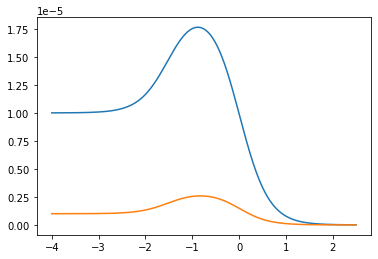

In [8]:
x,y=model.SLD_profile()
plot(x,[yi.real for yi in y])
plot(x,[yi.imag for yi in y])

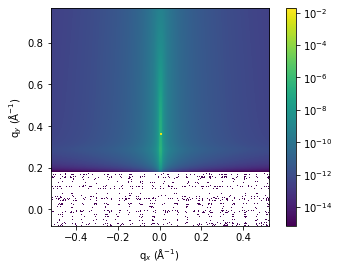

In [9]:
res = sim.runGISANS()
res

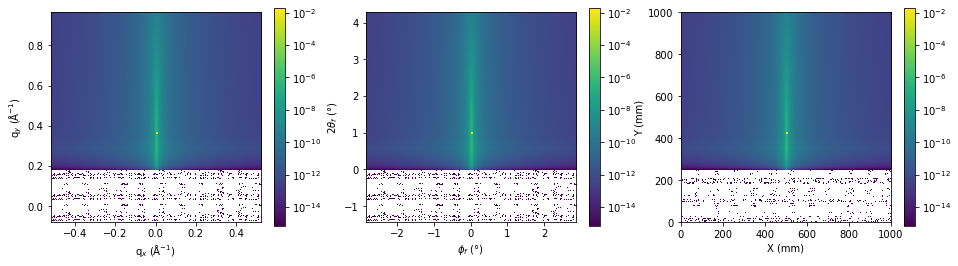

In [10]:
figure(figsize=(16,4))
subplot(131)
res.plot_q()
subplot(132)
res.plot_angle()
subplot(133)
res.plot_detector()